In [2]:
import pandas as pd
import numpy as np
import numpy.random as npr
npr.seed(123456)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy.stats as stats
from sklearn import cluster, datasets
from scipy import integrate
#import scipy.stats.linregress()

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


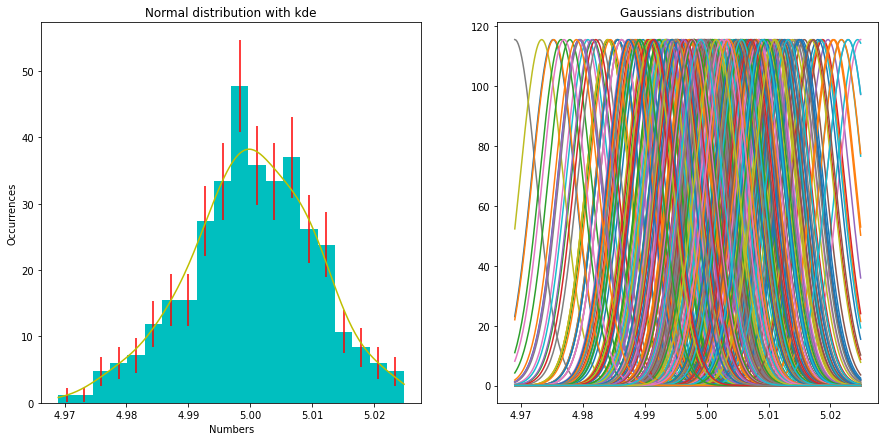

In [14]:

N, mu, sigma = 300, 5, .01 # mean and standard deviation
x = npr.normal(mu, sigma, N)


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,7))
n, bins,_ = ax1.hist(x, bins=20, density=True,color='c' )
hist = (bins[1:] + bins[:-1])/2
ax1.errorbar(hist, n, yerr=np.sqrt(n), linestyle=' ', color='r')
ax1.set_xlabel("Numbers")
ax1.set_ylabel("Occurrences")
ax1.set_title("Normal distribution with kde")


std_default=1.06*x.std()*x.size**(-1/5)

y=np.linspace(x.min(), x.max(), N)
gaussians = []
for value in x:
    gauss=stats.norm.pdf(y,value,std_default)   # x axis, mean, std
    ax2.plot(y, gauss)
    gaussians.append(gauss)
    ax2.set_title("Gaussians distribution")
kde = np.sum(gaussians, axis=0)
integral_1 = integrate.trapz(n, bins[:-1])
integral_2 = integrate.trapz(kde, y)
norm_kde = integral_1/integral_2
ax1.plot(y, kde*norm_term, color='y');



2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

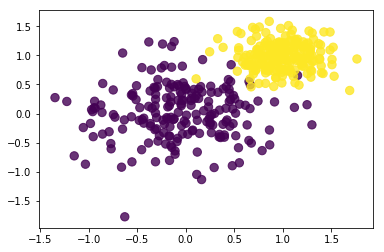

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [ ]:
def fun(x,y):
     

<ipython-input-46-4b5cbd3d66d6>:2: RuntimeWarning: covariance is not positive-semidefinite.
  x =npr.multivariate_normal(mu, cov_x, 500)


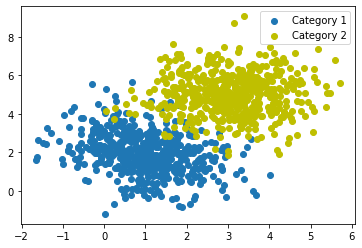

In [46]:
mu, cov_x =[1, 2] ,[(1, -.5), (-.05, 1)]
x =npr.multivariate_normal(mu, cov_x, 500)
df_x = pd.DataFrame({'A':x[:,0], 'B':x[:,1]})

mu_y, cov_y =[3, 5] ,[(1, .01), (.01, 1)]
y =npr.multivariate_normal(mu_y, cov_y, 500)
df_y = pd.DataFrame({'A':y[:,0], 'B':y[:,1]})

plt.scatter(df_x['A'], df_x['B'], label='Category 1')
plt.scatter(df_y['A'], df_y['B'], color= 'y', label='Category 2')
plt.legend();


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [3]:
arr = np.load('residuals_261.npy', allow_pickle= True)
arr=arr.item()

In [4]:
df= pd.DataFrame(arr)
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


C:\Users\media\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


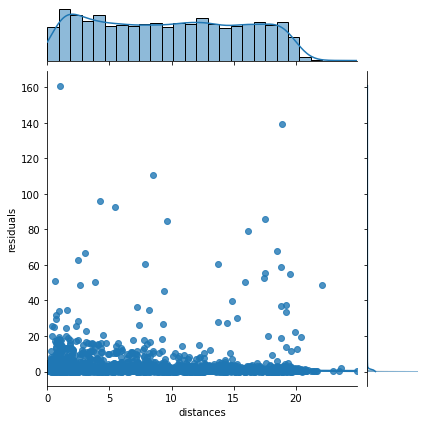

In [5]:

df = df.abs()
df.drop(df[df.residuals < 2].index,  inplace=False)
#df.reset_index(drop=True, inplace = False)

m, c,r, p, stderr= stats.linregress(df['residuals'], df['distances'])


x = np.linspace(df['distances'],20, 20)
y = c + m * x + stderr

sns.jointplot('distances', 'residuals',kind= 'reg', palette = 'blues', data=df)
